# One channel at a time
Anthony Correia\
09 Jan. 2021

In this notebook, we analyse the output of the LTDB cards for just one cell. We try to splot anomalies just by looking at the 1D distributions.

## Library

In [1]:
import os.path as op
import pandas as pd
import numpy as np
import glob
from project import defs

import lib.rootdata as lrd
import lib.plot as lp
from project import files, defs

## Variables

## Load samples

All the ROOT files for a given RUN

In [2]:
run = "00405127"
channelId = 939524096

list_paths = files.get_paths_run(run=run)[:10]

In [3]:
cut = f"channelId=={channelId}"
dataframe = lrd.load_ROOT_into_dataframe(list_paths, 
                                         variables=defs.unproc_kept_variables, 
                                         cut=cut, 
                                         tree_name=defs.unproc_tree_name,
                                         library="pd")

Number of events in the dataframe 737
Time taken to load the ROOT files: 11.57337474822998
ROOT files loaded: ['/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0596._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0597._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0598._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0599._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0600._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0601._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0602._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0603._SFO-ALL._0001.root', '/mnt/e/900GeV/00405127/a

In [4]:
dataframe = files.process_dataframe(dataframe)

Remove NaN events
0 events removed out of 737 -> efficiency 0.0
Time taken: 0.02107691764831543


## Compute variables of interest

In [5]:
dataframe = files.compute_voi(
    dataframe=dataframe
)

Time taken: 0.006601572036743164


## Plot

Fig saved in /home/anthony/3A_CS/projet_ATLAS/output//images/channelId_939524096/std.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS/output//images/channelId_939524096/std.pdf


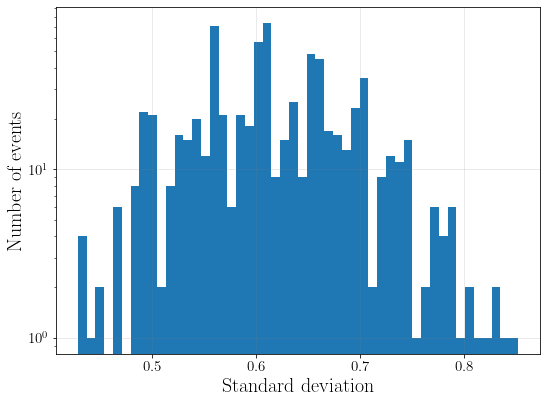

In [6]:
path = f"channelId_{channelId}"
              
fig, ax = lp.plot_hist(dataframe['std'], 'Standard deviation', logscale=True)
lp.save_fig(fig, path=path, name="std")

Fig saved in /home/anthony/3A_CS/projet_ATLAS/output//images/channelId_939524096/mean_std_ped.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS/output//images/channelId_939524096/mean_std_ped.pdf


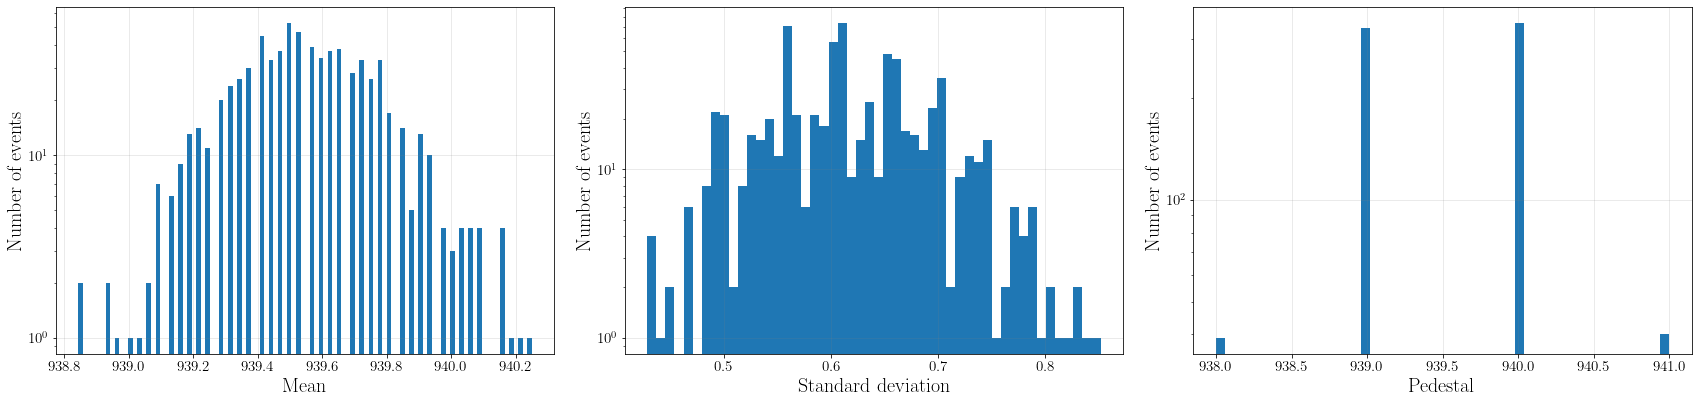

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(8*3, 6))
lp.plot_hist(dataframe['mean'], 'Mean', axes[0], logscale=True, bins=100)
lp.plot_hist(dataframe['std'], 'Standard deviation', axes[1], logscale=True)
lp.plot_hist(dataframe['pedestal'], 'Pedestal', axes[2], logscale=True)

lp.save_fig(fig, path=path, name="mean_std_ped")

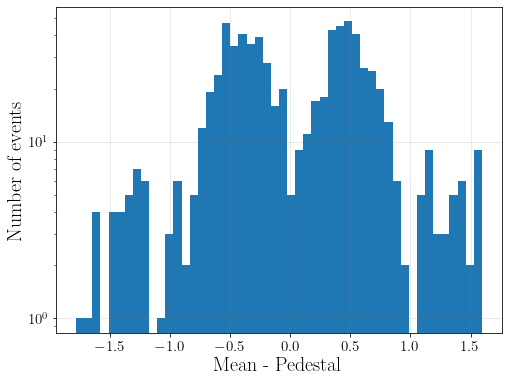

In [8]:
_ = lp.plot_hist(dataframe['mean'] - dataframe['pedestal'], 'Mean - Pedestal', logscale=True)

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot:xlabel='Mean', ylabel='Standard deviation'>)

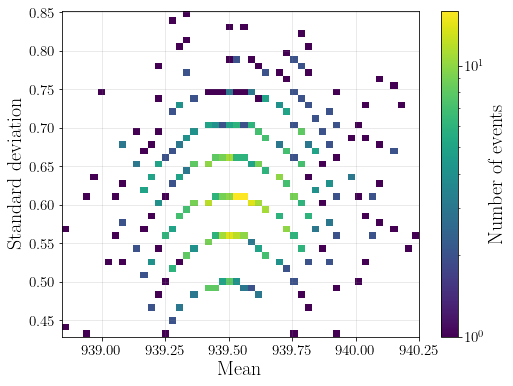

In [9]:
lp.plot_hist2d(
    dataframe['mean'], dataframe['std'],
    "Mean", "Standard deviation",
    logscale=True,
)

## Look at abnormal events

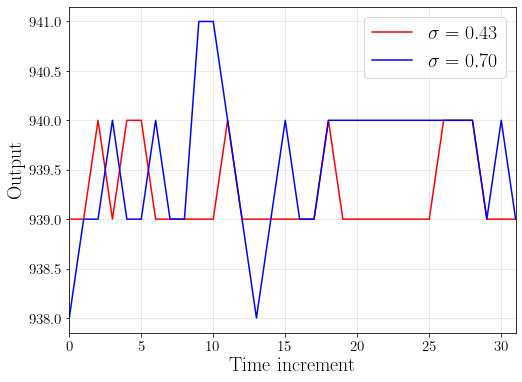

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

samples_low_std = dataframe.query("std<0.45").iloc[0]
samples_normal_std = dataframe.query("std>0.5").iloc[0]

lp.plot_event(samples_low_std, color="red", label=f"$\\sigma = {samples_low_std['std']:.2f}$", ax=ax)
lp.plot_event(samples_normal_std, color="blue", label=f"$\\sigma = {samples_normal_std['std']:.2f}$", ax=ax)
ax.legend()

